In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt
from datetime import timezone, timedelta

In [2]:
timezone_offset = -5.0  # Eastern Standard Time (UTC−08:00)
tzinfo = timezone(timedelta(hours=timezone_offset))
current_dateTime = datetime.now(tzinfo)

In [3]:
begin_date = '2024-08-12T00:00:00.000-05:00'
#end_date = '2024-08-14T11:00:00.000-05:00'
end_date = current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z')


In [4]:
print(end_date)

2024-10-21T11:53:19.755234-0500


In [5]:
print(current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z'))

2024-10-21T11:53:19.755234-0500


In [6]:
#print(end_date)

In [7]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)

print (pompton_plains)

pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

     agency_cd   site_no          datetime tz_cd 194446_00065 194446_00065_cd
0           5s       15s               20d    6s          14n             10s
1         USGS  01388500  2024-08-12 01:00   EDT         9.47               P
2         USGS  01388500  2024-08-12 01:15   EDT         9.47               P
3         USGS  01388500  2024-08-12 01:30   EDT         9.46               P
4         USGS  01388500  2024-08-12 01:45   EDT         9.46               P
...        ...       ...               ...   ...          ...             ...
6763      USGS  01388500  2024-10-21 11:30   EDT         7.86               P
6764      USGS  01388500  2024-10-21 11:45   EDT         7.86               P
6765      USGS  01388500  2024-10-21 12:00   EDT         7.86               P
6766      USGS  01388500  2024-10-21 12:15   EDT         7.85               P
6767      USGS  01388500  2024-10-21 12:30   EDT         7.85               P

[6768 rows x 6 columns]


,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage


In [8]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2024-08-12 01:00,2.30,riverdale_gage
2024-08-12 01:15,2.30,riverdale_gage
2024-08-12 01:30,2.30,riverdale_gage
2024-08-12 01:45,2.29,riverdale_gage
2024-08-12 02:00,2.29,riverdale_gage


In [9]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2024-08-12 01:00,EDT,8.14,P
2,USGS,01388000,2024-08-12 01:05,EDT,8.14,P
3,USGS,01388000,2024-08-12 01:10,EDT,8.13,P
4,USGS,01388000,2024-08-12 01:15,EDT,8.13,P
5,USGS,01388000,2024-08-12 01:20,EDT,8.13,P
...,...,...,...,...,...,...
20263,USGS,01388000,2024-10-21 11:55,EDT,6.56,P
20264,USGS,01388000,2024-10-21 12:00,EDT,6.56,P
20265,USGS,01388000,2024-10-21 12:05,EDT,6.56,P
20266,USGS,01388000,2024-10-21 12:10,EDT,6.56,P


In [10]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2024-08-12 01:00,8.14,ramapo_gage
2024-08-12 01:05,8.14,ramapo_gage
2024-08-12 01:10,8.13,ramapo_gage
2024-08-12 01:15,8.13,ramapo_gage
2024-08-12 01:20,8.13,ramapo_gage


In [11]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,pompton_precip
2024-08-12 01:15,0.0,pompton_precip
2024-08-12 01:30,0.0,pompton_precip
2024-08-12 01:45,0.0,pompton_precip
2024-08-12 02:00,0.0,pompton_precip


In [12]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,ramapo_precip
2024-08-12 01:15,0.0,ramapo_precip
2024-08-12 01:30,0.0,ramapo_precip
2024-08-12 01:45,0.0,ramapo_precip
2024-08-12 02:00,0.0,ramapo_precip


In [13]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

merge

In [14]:
merge

,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage
...,...,...
2024-10-21 11:00,0.00,ramapo_precip
2024-10-21 11:15,0.00,ramapo_precip
2024-10-21 11:30,0.00,ramapo_precip


In [15]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2024-08-12 01:00,9.47,pompton_gage
1,2024-08-12 01:15,9.47,pompton_gage
2,2024-08-12 01:30,9.46,pompton_gage
3,2024-08-12 01:45,9.46,pompton_gage
4,2024-08-12 02:00,9.45,pompton_gage
...,...,...,...
47298,2024-10-21 11:00,0.00,ramapo_precip
47299,2024-10-21 11:15,0.00,ramapo_precip
47300,2024-10-21 11:30,0.00,ramapo_precip
47301,2024-10-21 11:45,0.00,ramapo_precip


In [16]:
test_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
test_data = test_data.convert_frequency(freq='H', agg_numeric="max")
test_data.head()

/Users/tott/opt/anaconda3/envs/py310/lib/python3.10/site-packages/autogluon/timeseries/dataset/ts_dataframe.py:942: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


series
item_id      timestamp                  
pompton_gage 2024-08-12 01:00:00    9.47
             2024-08-12 02:00:00    9.45
             2024-08-12 03:00:00    9.43
             2024-08-12 04:00:00    9.41
             2024-08-12 05:00:00    9.39

In [17]:
predictor = TimeSeriesPredictor.load('models/pompton_gage_autogluon_6', require_version_match=False)

In [18]:
predictions = predictor.predict(test_data)

In [19]:
predictions

mean       0.1       0.2       0.3  \
item_id        timestamp                                                     
pompton_gage   2024-10-21 13:00:00  7.859674  7.824497  7.834916  7.842593   
               2024-10-21 14:00:00  7.859351  7.806404  7.822957  7.835214   
               2024-10-21 15:00:00  7.859028  7.788357  7.810186  7.823537   
               2024-10-21 16:00:00  7.858706  7.786011  7.800212  7.820523   
               2024-10-21 17:00:00  7.858383  7.776541  7.797085  7.817778   
               2024-10-21 18:00:00  7.858060  7.767080  7.791727  7.815757   
riverdale_gage 2024-10-21 13:00:00  1.929891  1.830328  1.859817  1.881546   
               2024-10-21 14:00:00  1.929783  1.779921  1.826772  1.861466   
               2024-10-21 15:00:00  1.929675  1.729646  1.791429  1.829220   
               2024-10-21 16:00:00  1.929567  1.723810  1.764005  1.821495   
               2024-10-21 17:00:00  1.929459  1.697812  1.755958  1.814528   
               2024-10-21 18:00:00  1.929352  1.671836  1.741595  1.809608   
ramapo_gage    2024-10-21 13:00:00  6.559746  6.541482  6.546892  6.550878   
               2024-10-21 14:00:00  6.559397  6.531906  6.540500  6.546865   
               2024-10-21 15:00:00  6.559047  6.522354  6.533687  6.540620   
               2024-10-21 16:00:00  6.558698  6.520955  6.528328  6.538873   
               2024-10-21 17:00:00  6.558348  6.515857  6.526522  6.537267   
               2024-10-21 18:00:00  6.557999  6.510763  6.523560  6.536036   
pompton_precip 2024-10-21 13:00:00 -0.000007 -0.022282 -0.015684 -0.010823   
               2024-10-21 14:00:00 -0.000009 -0.026461 -0.015354 -0.011312   
               2024-10-21 15:00:00 -0.000011 -0.031253 -0.019708 -0.012362   
               2024-10-21 16:00:00 -0.000013 -0.027521 -0.020858 -0.013457   
               2024-10-21 17:00:00 -0.000015 -0.025501 -0.016698 -0.010738   
               2024-10-21 18:00:00 -0.000017 -0.027476 -0.017767 -0.010189   
ramapo_precip  2024-10-21 13:00:00  0.000037 -0.325827 -0.229310 -0.158193   
               2024-10-21 14:00:00  0.000041 -0.360097 -0.240332 -0.155786   
               2024-10-21 15:00:00  0.000045 -0.403592 -0.247628 -0.155195   
               2024-10-21 16:00:00  0.000049 -0.379115 -0.250981 -0.175509   
               2024-10-21 17:00:00  0.000052 -0.299017 -0.205801 -0.121677   
               2024-10-21 18:00:00  0.000056 -0.320620 -0.200484 -0.107966   

                                         0.4       0.5       0.6       0.7  \
item_id        timestamp                                                     
pompton_gage   2024-10-21 13:00:00  7.852938  7.861228  7.870126  7.878049   
               2024-10-21 14:00:00  7.846491  7.856755  7.865679  7.878266   
               2024-10-21 15:00:00  7.840986  7.853413  7.869425  7.882959   
               2024-10-21 16:00:00  7.831959  7.842972  7.861429  7.881582   
               2024-10-21 17:00:00  7.833266  7.848331  7.865960  7.886772   
               2024-10-21 18:00:00  7.834835  7.859055  7.874208  7.891553   
riverdale_gage 2024-10-21 13:00:00  1.910825  1.934288  1.959474  1.981899   
               2024-10-21 14:00:00  1.893382  1.922433  1.947692  1.983318   
               2024-10-21 15:00:00  1.878606  1.913780  1.959099  1.997406   
               2024-10-21 16:00:00  1.853860  1.885032  1.937273  1.994312   
               2024-10-21 17:00:00  1.858363  1.901002  1.950899  2.009805   
               2024-10-21 18:00:00  1.863608  1.932162  1.975045  2.024140   
ramapo_gage    2024-10-21 13:00:00  6.556249  6.560553  6.565173  6.569287   
               2024-10-21 14:00:00  6.552719  6.558048  6.562682  6.569218   
               2024-10-21 15:00:00  6.549680  6.556132  6.564446  6.571473   
               2024-10-21 16:00:00  6.544811  6.550529  6.560113  6.570576   
               2024-10-21 17:00:00  6.545308  6.553131  6.562283  6.573090   
               2024-10-21 18:00:00  6.545942  6.558517  6.566

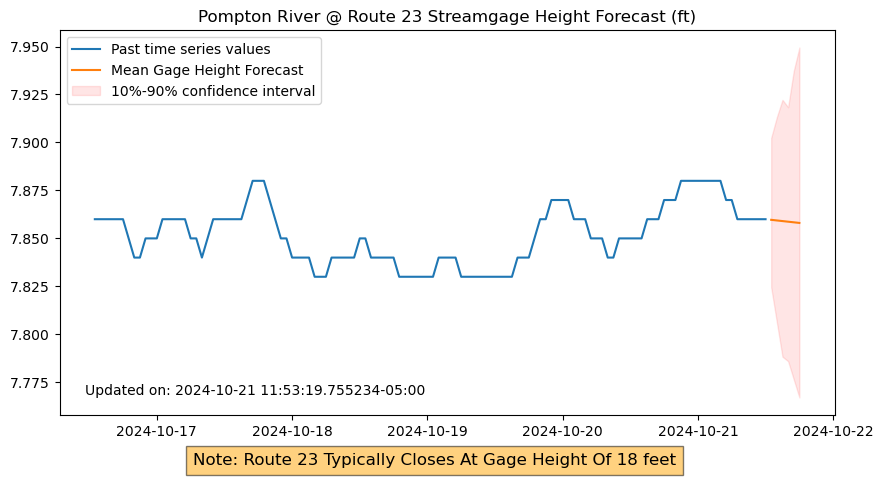

In [20]:
item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title('Pompton River @ Route 23 Streamgage Height Forecast (ft)')


y_past = test_data.loc[item_id]
y_pred = predictions.loc[item_id]

plt.plot(y_past[-120:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean Gage Height Forecast")
#plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.figtext(0.5, 0.01, "Note: Route 23 Typically Closes At Gage Height Of 18 feet", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.15, 0.15, 'Updated on: '+str(current_dateTime), ha='left', fontsize=10)
plt.legend(loc = 'upper left');
plt.savefig('pompton-gage-forecast.png')

In [21]:
print(current_dateTime)

2024-10-21 11:53:19.755234-05:00
